In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Hello World")

Hello World


In [3]:
img = cv2.imread('/Users/pravinpb/pycode/openCV/workshop/assets/Young people with laptop.jpg', 0)

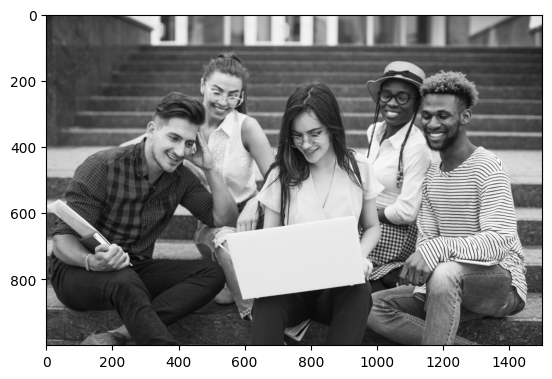

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Color to Black & White

In [5]:
def load_image(path):
    return cv2.imread(path)


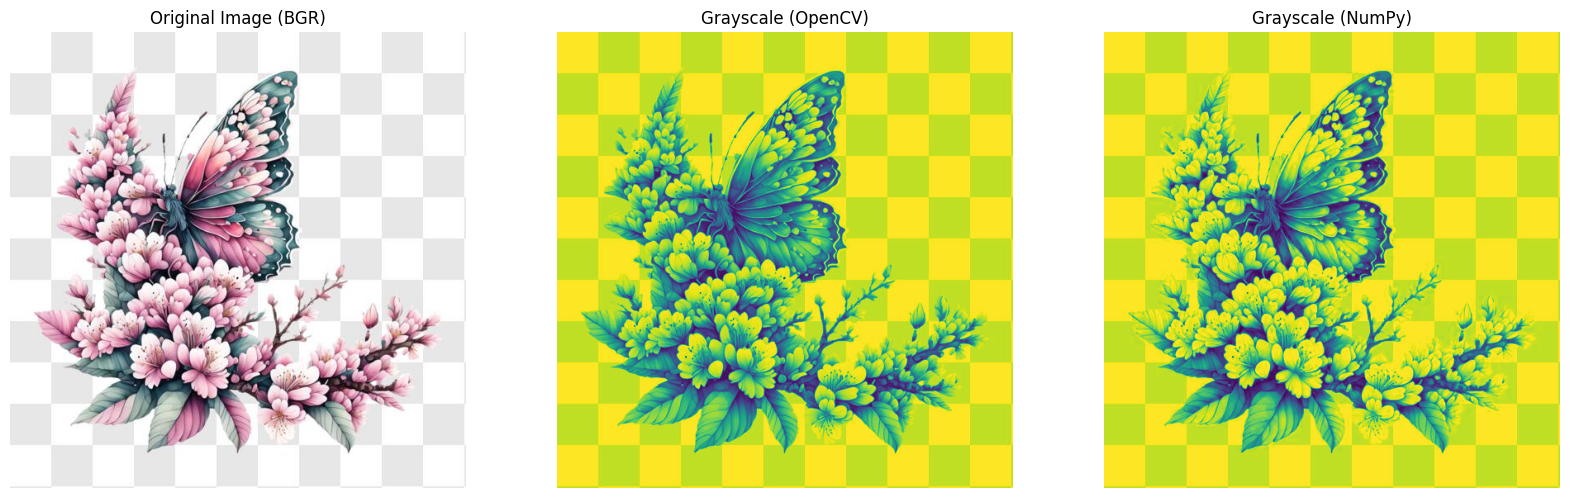

In [6]:
image = load_image("/Users/pravinpb/pycode/openCV/workshop/assets/abstract.jpeg")

gray_cv2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
weights = [0, 0, 1]
gray_numpy = np.dot(image, weights).astype(np.uint8)


plt.figure(figsize=(20, 10))  

plt.subplot(131)
plt.title("Original Image (BGR)")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
plt.axis("off")

plt.subplot(132)
plt.title("Grayscale (OpenCV)")
plt.imshow(gray_cv2) 
plt.axis("off")

plt.subplot(133)
plt.title("Grayscale (NumPy)")
plt.imshow(gray_numpy)
plt.axis("off")

plt.show()

Filters

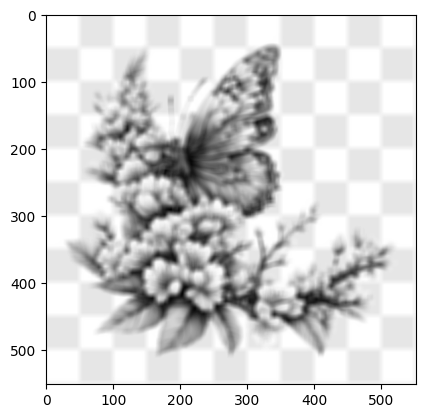

In [7]:
def apply_filter(image, kernel_size = 9):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / kernel_size**2
    return cv2.filter2D(image, -1, kernel)
average_filter = apply_filter(gray_cv2)
plt.imshow(average_filter, cmap='gray')

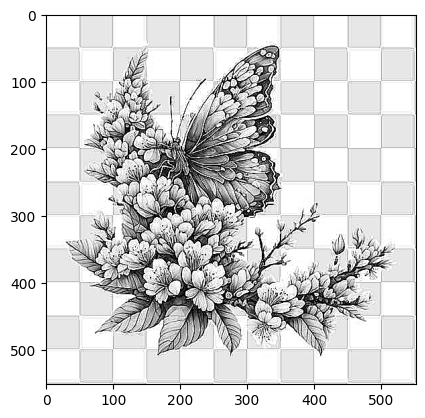

In [8]:
def apply_sharpness(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,9,-1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)
sharpeness = apply_sharpness(gray_cv2)
plt.imshow(sharpeness, cmap='gray')

(-0.5, 551.5, 551.5, -0.5)

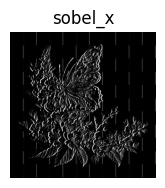

In [9]:
sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

def apply_sharpening_filter_sobel(image):
    kernel = sobel_x
    
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread("/Users/pravinpb/pycode/openCV/workshop/assets/abstract.jpeg", cv2.IMREAD_GRAYSCALE)

plt.subplot(131)
plt.title("sobel_x")
plt.imshow(cv2.cvtColor(apply_sharpening_filter_sobel(image), cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 551.5, 551.5, -0.5)

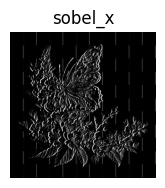

In [10]:
sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

def apply_sharpening_filter_sobel(image):
    kernel = sobel_x
    
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread("/Users/pravinpb/pycode/openCV/workshop/assets/abstract.jpeg", cv2.IMREAD_GRAYSCALE)

plt.subplot(131)
plt.title("sobel_x")
plt.imshow(cv2.cvtColor(apply_sharpening_filter_sobel(image), cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 551.5, 551.5, -0.5)

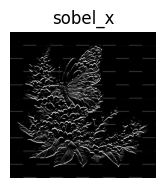

In [11]:
sobel_x = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

def apply_sharpening_filter_sobel(image):
    kernel = sobel_x
    
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread("/Users/pravinpb/pycode/openCV/workshop/assets/abstract.jpeg", cv2.IMREAD_GRAYSCALE)

plt.subplot(131)
plt.title("sobel_x")
plt.imshow(cv2.cvtColor(apply_sharpening_filter_sobel(image), cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 551.5, 551.5, -0.5)

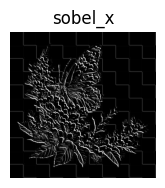

In [12]:
sobel_x = np.array([
    [0,-2,-1],
    [2,0,-2],
    [1,2,0]
])

def apply_sharpening_filter_sobel(image):
    kernel = sobel_x
    
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread("/Users/pravinpb/pycode/openCV/workshop/assets/abstract.jpeg", cv2.IMREAD_GRAYSCALE)

plt.subplot(131)
plt.title("sobel_x")
plt.imshow(cv2.cvtColor(apply_sharpening_filter_sobel(image), cv2.COLOR_BGR2RGB))
plt.axis('off')

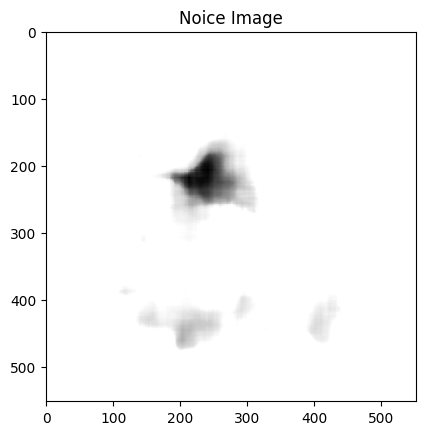

In [13]:
noice  = np.random.normal(0, 15, image.shape).astype(np.uint8)
noice_image = cv2.add(image, noice)
noice_average_image = apply_filter(noice_image)
median_blur = cv2.medianBlur(noice_image, 59)
plt.title("Noice Image")
# plt.imshow(noice_average_image, cmap='gray')
plt.imshow(median_blur, cmap='gray')
# plt.imshow(noice_image, cmap='gray')

Transfer


In [14]:
def log_transform(image, c=4):
    return np.uint8(c * np.log(1+ image.astype(np.float32)))

def gamma_transform(image, gamma=45):
    return np.uint8((1+(image.astype(np.float32) / 255) ** gamma) * 255)

def inverse_log_transform(image, c=3):
    return np.uint8(np.exp(image.astype(np.float32) / c) - 1)

In [15]:
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [36]:
log_transform_image = log_transform(image, 4)
inverse_log_transform_image = inverse_log_transform(image, 4)
gamma_transform_image = gamma_transform(image, 4)

plt.subplot(131)
plt.title("Log Transform")
plt.imshow(log_transform_image, cmap='gray'])

plt.subplot(132)
plt.title("Inverse Log Transform")
plt.imshow(inverse_log_transform_image, cmap='gray')

plt.subplot(133)
plt.title("Gamma Transform")
plt.imshow(gamma_transform_image, cmap='gray')


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2775699700.py, line 7)

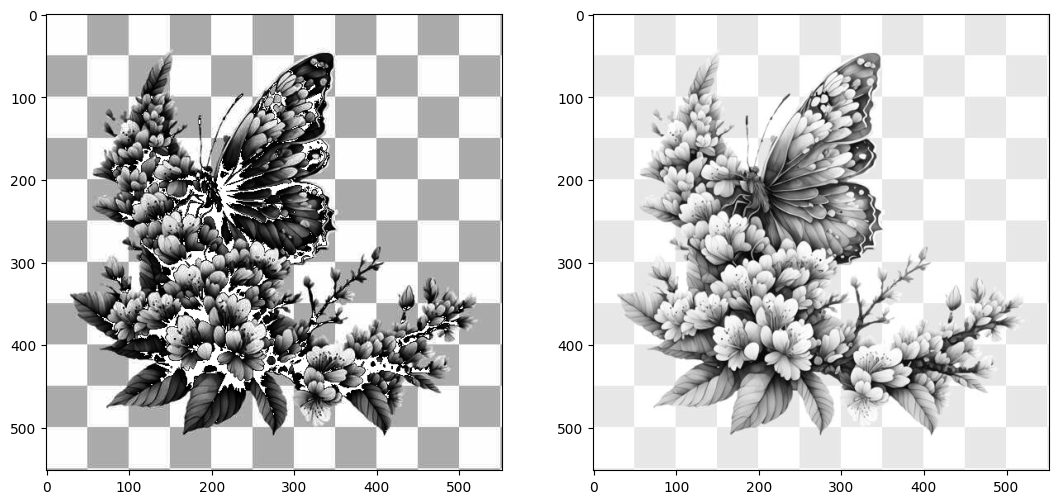

In [37]:
plt.figure(figsize=(20, 20))

plt.subplot(131)
plt.imshow(gamma_transform_image, cmap='gray')

plt.subplot(132)
plt.imshow(gray_cv2, cmap='gray')


Contors


In [39]:
def find_contours(image, binary_threshold=127):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image = image

    ret, thresh = cv2.threshold(image, binary_threshold, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    image_contors = image.copy()
    cv2.drawContours(image_contors, contours, -1, (0,255,0), 2)
    return image_contors, contours, hierarchy

In [38]:
def apply_erosion(image, kernel_size=(3,3),iterations=1):
    kernel = np.ones((kernel_size), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=iterations)  
    return eroded_image

In [40]:
def apply_dilation(image, kernel_size=(3,3),iterations=1):
    kernel = np.ones((kernel_size), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=iterations)  
    plt.imshow(dilated_image, cmap='gray')
    return dilated_image

In [45]:
def find_blobs(image, min_blob_size=100):
    image_with_contours, contours, _ = find_contours(image.copy())
    mask = np.zeros_like(image, np.uint8)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_blob_size and area < 200:
            area = cv2.drawContours(mask, [cnt], 0, 255,-1)
    return mask

In [59]:
image = cv2.imread("/Users/pravinpb/pycode/openCV/workshop/assets/Young people with laptop.jpg")


In [66]:
image_with_contours, contours, hier = find_contours(image.copy())
diluted_image = apply_dilation(image.copy(), kernel_size=(6,6), iterations=1)
blob_mask = find_blobs(diluted_image, min_blob_size=0.1)

In [67]:
plt.figure(figsize=(50, 50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

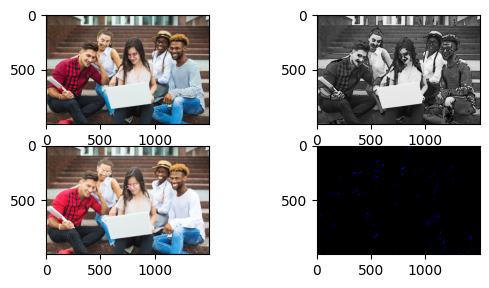

In [68]:
plt.subplot(321)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(322)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.subplot(323)
plt.imshow(cv2.cvtColor(diluted_image, cv2.COLOR_BGR2RGB))
plt.subplot(324)
plt.imshow(cv2.cvtColor(blob_mask, cv2.COLOR_BGR2RGB))